In [ ]:
#ML(Heirarchical_clustering)-->first we need to how many cluster i should make so that data organized 
#in correct order 
#for that i have to plot dendograme to longest vertical lines no horizontal line cross them
#then import Agglomerativeclustering (means hierarchical clustering)
#then fit and predict
#then sillhouette_score to check accuracy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\usman\\Documents\\Mall_customers.csv")

In [2]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
df1=df[["Age"]]
df2=df[["Annual Income (k$)"]]

In [4]:
final_df=pd.concat([df1,df2],axis="columns")

In [5]:
final_df

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


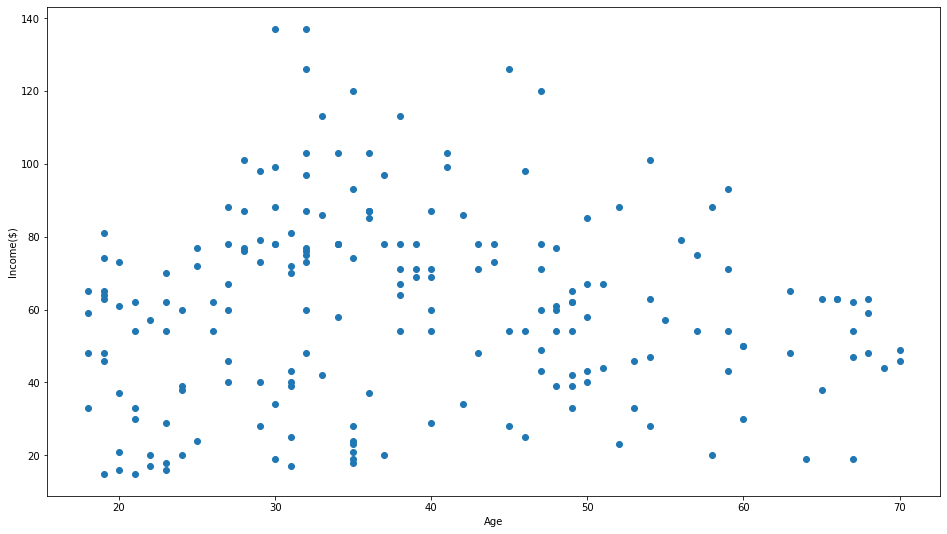

In [6]:
plt.figure(figsize=(16,9))
plt.scatter(final_df["Age"],final_df["Annual Income (k$)"])
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

In [7]:
 import scipy.cluster.hierarchy as sch

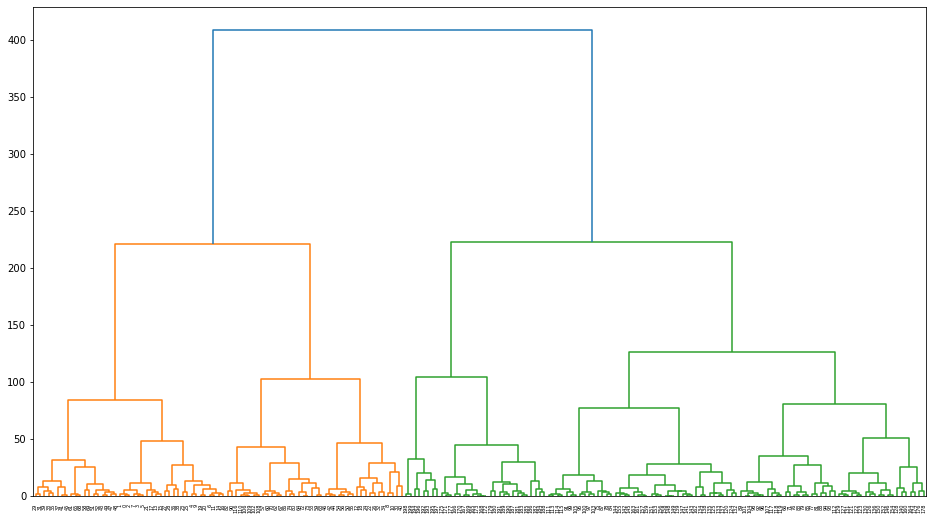

In [8]:
plt.figure(figsize=(16,9))
sch.dendrogram(sch.linkage(final_df,method="ward"))
plt.show()

In [9]:
from sklearn.cluster import KMeans

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
dd=AgglomerativeClustering(n_clusters=2,
    affinity='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None)

In [12]:
final_df["cluster"]=dd.fit_predict(final_df)

In [13]:
final_df

,Age,Annual Income (k$),cluster
0,19,15,1
1,21,15,1
2,20,16,1
3,23,16,1
4,31,17,1
...,...,...,...
195,35,120,0
196,45,126,0
197,32,126,0
198,32,137,0


In [14]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_score(final_df,final_df.cluster)

0.4106710030545199

In [17]:
from sklearn.preprocessing import StandardScaler

In [28]:
ssc=StandardScaler()
d=final_df.drop(["cluster"],axis="columns")

In [29]:
bbc=ssc.fit_transform(d)

In [30]:
bbc

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033],
       [-1.20926872, -1.66266033],
       [-0.27630176, -1.62449091],
       [-1.13750203, -1.62449091],
       [ 1.80493225, -1.58632148],
       [-0.6351352 , -1.58632148],
       [ 2.02023231, -1.58632148],
       [-0.27630176, -1.58632148],
       [ 1.37433211, -1.54815205],
       [-1.06573534, -1.54815205],
       [-0.13276838, -1.54815205],
       [-1.20926872, -1.54815205],
       [-0.27630176, -1.50998262],
       [-1.3528021 , -1.50998262],
       [ 0.94373197, -1.43364376],
       [-0.27630176, -1.43364376],
       [-0.27630176, -1.39547433],
       [-0.99396865, -1.39547433],
       [ 0.51313183, -1.3573049 ],
       [-0.56336851, -1.3573049 ],
       [ 1.08726535, -1.24279661],
       [-0.70690189, -1.24279661],
       [ 0.44136514, -1.24279661],
       [-0.27630176, -1.24279661],
       [ 0.08253169,

In [31]:
ffdf=pd.DataFrame(bbc,columns=["Age","Annual Income (k$)"])

In [36]:
ffdf.describe()

,Age,Annual Income (k$)
count,2.000000e+02,2.000000e+02
mean,-9.603429e-17,-6.128431e-16
std,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00
25%,-7.248436e-01,-7.275093e-01
50%,-2.045351e-01,3.587926e-02
75%,7.284319e-01,6.656748e-01
max,2.235532e+00,2.917671e+00


C:\Users\usman\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


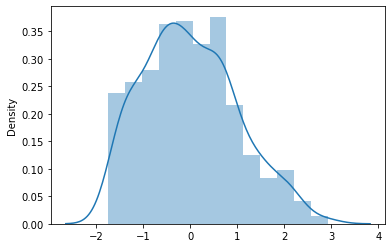

In [75]:
import seaborn as sns

sns.distplot(ffdf)
plt.show()

C:\Users\usman\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

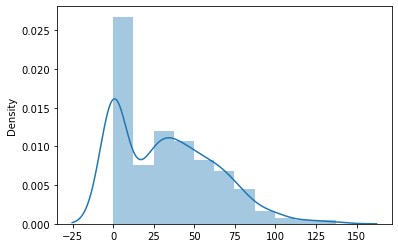

In [76]:
sns.distplot(final_df)

In [46]:
import scipy.cluster.hierarchy as sh

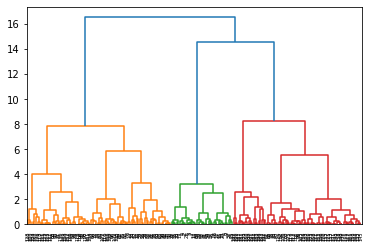

In [48]:
sh.dendrogram(sh.linkage(ffdf,method="ward"))
plt.show()

In [63]:
from sklearn.cluster import AgglomerativeClustering

In [68]:
vc=AgglomerativeClustering(n_clusters=2,
    affinity='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None)

In [69]:
y_pred=vc.fit_predict(ffdf)

In [70]:
from sklearn.metrics import silhouette_score

In [71]:
silhouette_score(ffdf,y_pred)


0.3327529473550603

In [77]:
#ML(Kmeans)-->first we need to how many cluster i should make so that data organized 
#in correct order 
#for that i have to plot elbow to suitable cluster
#then import Kmeans
#then fit and predict
#then sillhouette_score to check accuracy

In [79]:
ffdf

,Age,Annual Income (k$)
0,-1.424569,-1.738999
1,-1.281035,-1.738999
2,-1.352802,-1.700830
3,-1.137502,-1.700830
4,-0.563369,-1.662660
...,...,...
195,-0.276302,2.268791
196,0.441365,2.497807
197,-0.491602,2.497807
198,-0.491602,2.917671


In [85]:
from sklearn.cluster import KMeans

In [88]:
irg=range(1,12)
sse=[]
for k in irg:
    km=KMeans(n_clusters=k)
    km.fit(ffdf)
    sse.append(km.inertia_)

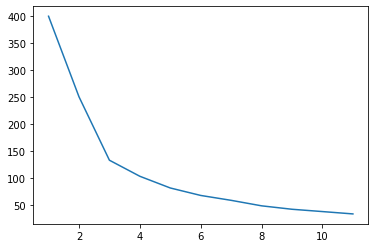

In [91]:
plt.plot(irg,sse)
plt.show()

In [92]:
gg=KMeans(n_clusters=4)

In [100]:
xyz=gg.fit_predict(ffdf)
xyz

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [95]:
from sklearn.metrics import silhouette_score

In [96]:
silhouette_score(ffdf,xyz)

0.4053219101959163

In [97]:
ffdf['cluster']=xyz

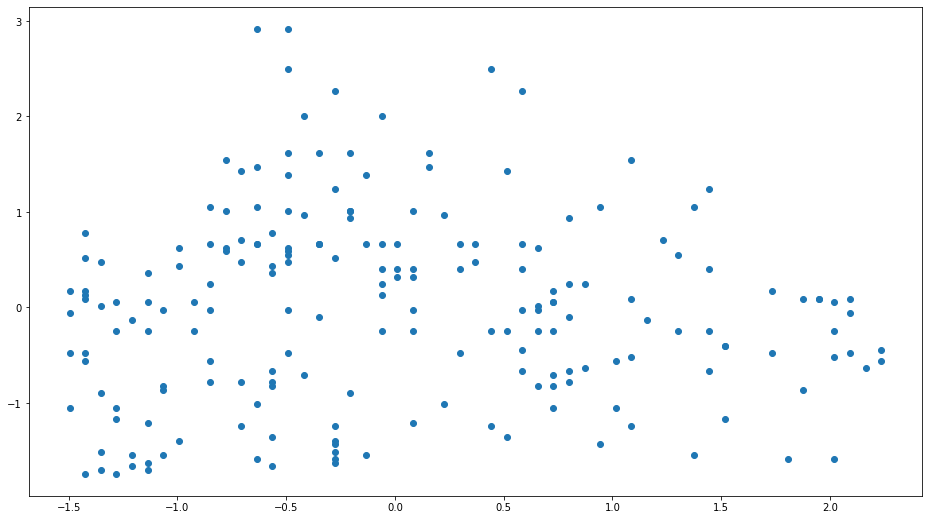

In [109]:
plt.figure(figsize=(16,9))
plt.scatter(ffdf["Age"],ffdf['Annual Income (k$)'])